In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


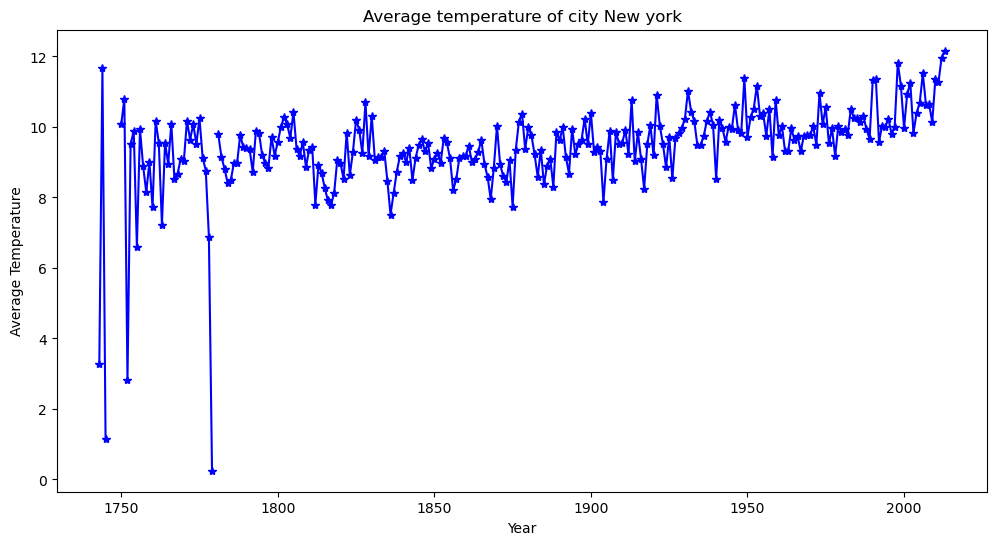

In [4]:
#Line Plot
city_data=df[df['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['Year']=city_data['dt'].dt.year
avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(avg_temp['Year'],avg_temp['AverageTemperature'],color='blue',linestyle='-',marker='*')
plt.title("Average temperature of city New york")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

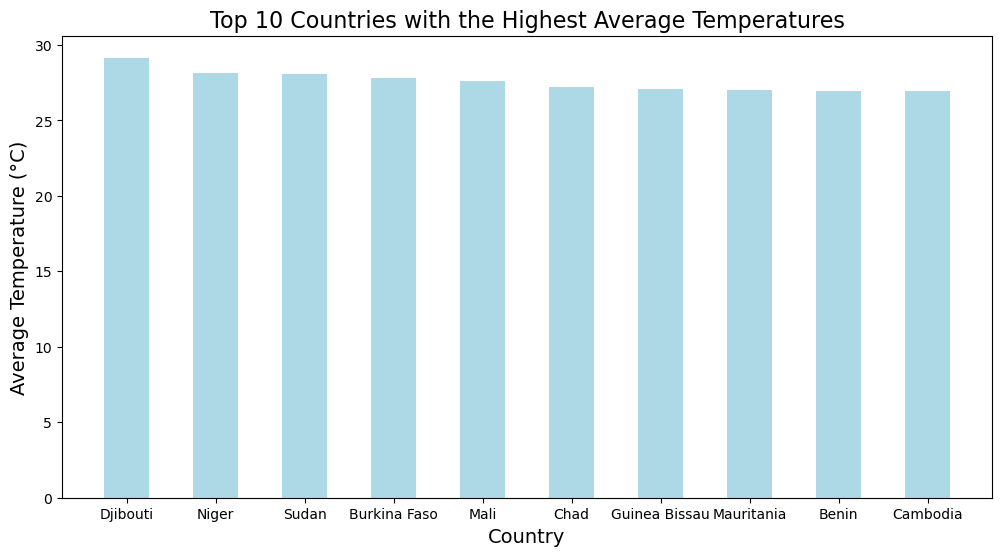

In [12]:
#Bar Plot
country_avg=df.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg=country_avg.dropna()
country_sort=country_avg.sort_values(by='AverageTemperature',ascending=False)
top=country_sort.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top['Country'], top['AverageTemperature'], color='lightblue',width=0.5)
plt.ylabel('Average Temperature (°C)',fontsize=14)
plt.xlabel('Country',fontsize=14)
plt.title('Top 10 Countries with the Highest Average Temperatures',fontsize=16)
plt.show()

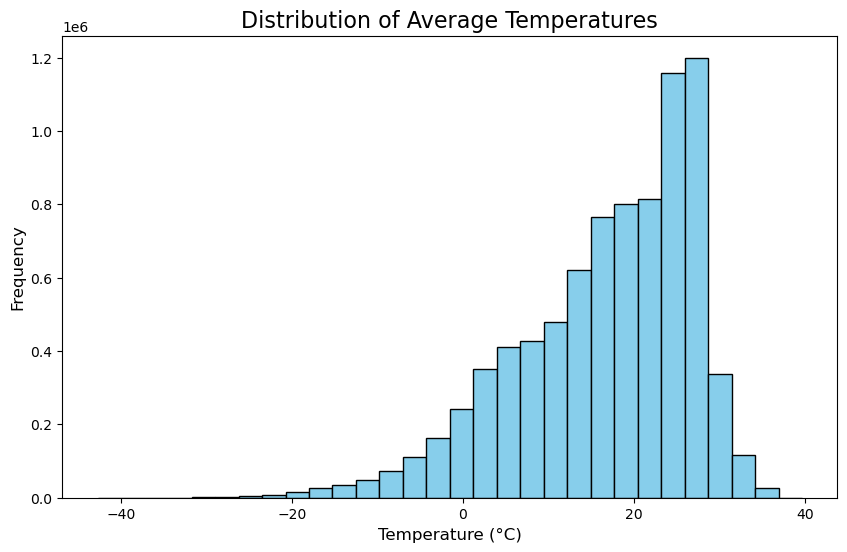

In [7]:
#Histogram
temp_data=df['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(temp_data,bins=30,color='skyblue',edgecolor='black')
plt.title("Distribution of Average Temperatures",fontsize=16)
plt.xlabel('Temperature (°C)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

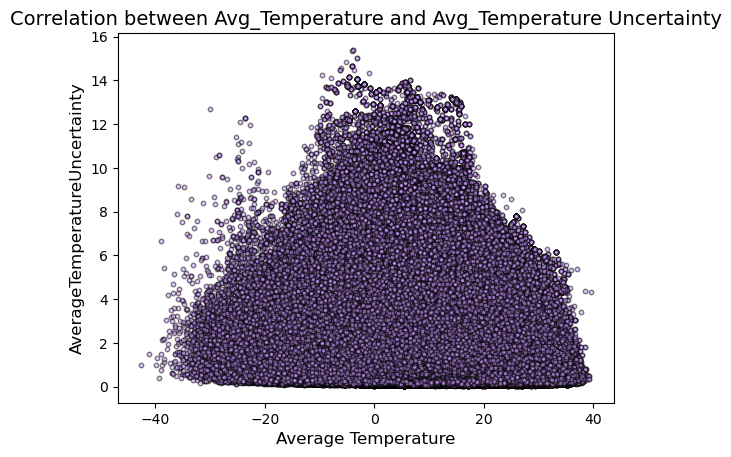

In [15]:
#Scatter Plot
avg_temp=df['AverageTemperature'].dropna()
un_temp=df['AverageTemperatureUncertainty'].dropna()
plt.scatter(avg_temp,un_temp,color='#cc99ff',s=10,edgecolor='black',alpha=0.5)
plt.title("Correlation between Avg_Temperature and Avg_Temperature Uncertainty",fontsize=14)
plt.xlabel('Average Temperature',fontsize=12)
plt.ylabel('AverageTemperatureUncertainty',fontsize=12)
plt.show()

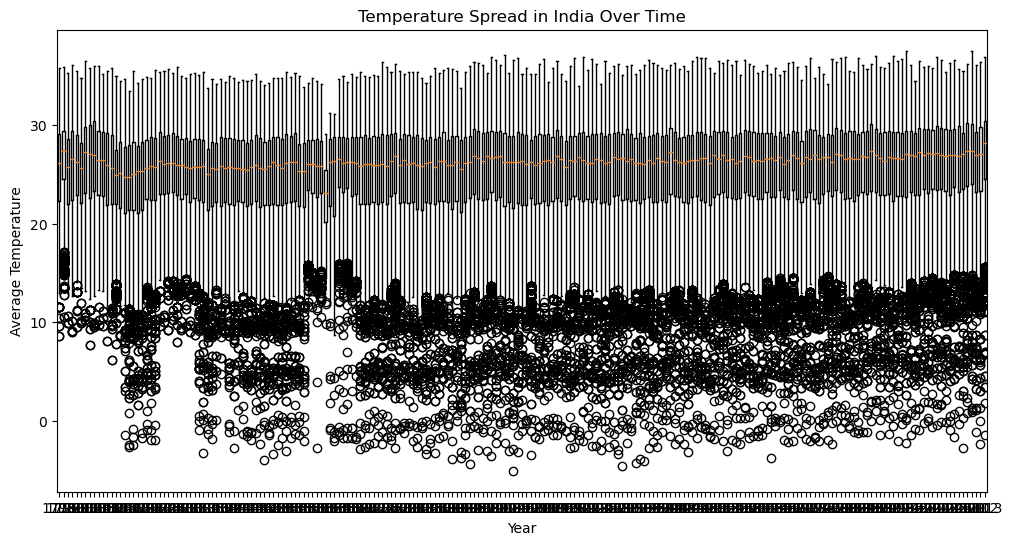

In [22]:
#Box Plot
country=df[df['Country']=='India'].copy()
country['dt']=pd.to_datetime(country['dt'],errors='coerce')
country=country.dropna(subset=['dt'])
country['Year']=country['dt'].dt.year
country=country[['Year','AverageTemperature']].dropna()
grouped_data=[group['AverageTemperature'] for _,group in country.groupby('Year')]
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data, labels=sorted(country['Year'].unique()))
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Spread in India Over Time')
plt.show()